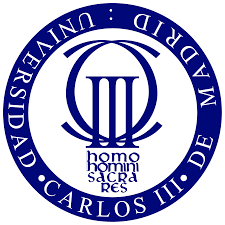

# PRÁCTICA 1: Procesamiento de datos mediante Apache Spark

Autores: Pablo Hidalgo Delgado, Till Niklas Kobele, Juan Romero Sanz, Juan María Villard Bardón.

NIAs: 100451225, 100548395, 100535977, 100439614.

Grupo de prácticas: D


## Índice
- [1. Introducción](#1.-Introducción)

- [2. Análisis exploratorio de los datos](#2.-Análisis-exploratorio-de-los-datos)

    - [2.1 Lectura de los datos](#2.1-Lectura-de-los-datos)
      
    - [2.2 Información básica](#2.2-Información-básica)

- [3. Preproceso de los datos](#3.-Preproceso-de-los-datos)


.

.

.


  
- [Conclusión](#conclusión)

## 1. Introducción

Este proyecto consiste en un análisis de los datos de viajes de YellowCab en la ciudad de Nueva York, utilizando Apache Spark para procesar grandes volúmenes de datos. Se realizan estudios sobre:

- Velocidad media de los taxis en función de la hora.
  
- Viajes en taxi más comunes.

- Registros financieros (propinas, recuento de pasajeros, etc.).
  
Esto se consigue mediante la implementación de consultas mediante Spark SQL, DataFrames y RDDs. El objetivo principal es realizar un análisis de rendimiento comparativo entre estas técnicas.


`revisar introducción`

## 2. Análisis exploratorio de los datos

Antes de empezar con las operaciones, vamos a realizar un pequeño análisis exploratorio de datos (EDA). De esta manera, podremos investigar y resumir las características más importantes de nuestro dataset. Esto nos servirá para comprender mejor el conjunto de datos.

### 2.1 Lectura de los datos

En primer lugar, leemos el conjunto de datos, que se encontrará almacenado en el archivo data/tripdata_2017-01.csv. Este fichero contiene datos sobre los viajes en taxi en la ciudad de Nueva York durante el mes de Enero de 2017.

In [6]:
import pandas as pd

route_data = "data/tripdata_2017-01.csv"

# Leemos el archivo csv
data_df = pd.read_csv(route_data)

print(type(data_df))

<class 'pandas.core.frame.DataFrame'>


Se obtiene un objeto dataframe con los datos almacenados.

### 2.2 Información básica

In [7]:
print(data_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971010 entries, 0 to 971009
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               971010 non-null  int64  
 1   tpep_pickup_datetime   971010 non-null  object 
 2   tpep_dropoff_datetime  971010 non-null  object 
 3   passenger_count        971010 non-null  int64  
 4   trip_distance          971010 non-null  float64
 5   RatecodeID             971010 non-null  int64  
 6   store_and_fwd_flag     971010 non-null  object 
 7   PULocationID           971010 non-null  int64  
 8   DOLocationID           971010 non-null  int64  
 9   payment_type           971010 non-null  int64  
 10  fare_amount            971010 non-null  float64
 11  extra                  971010 non-null  float64
 12  mta_tax                971010 non-null  float64
 13  tip_amount             971010 non-null  float64
 14  tolls_amount           971010 non-nu

El conjunto de datos se compone de **971010 filas y 17 atributos**. En cuanto a las columnas, 8 contienen valores de tipo float64, 6 contienen valores enteros (int64) y 3 contienen valores de tipo objeto (strings). Inspeccionando la página web [NYC TLC Trip Record Data](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), podemos encontrar el significado de todos estos atributos.

También podemos observar que NO existen columnas que contengan valores nulos. El número que aparece en la columna de Non-Null marca el número de valores que no son nulos para ese atributo del dataframe. El número que aparece en todos estos atributos es 971010, que es el número total entradas. Por tanto, ninguna columna del dataframe contiene valores nulos.

Ahora vamos a obtener los valores de las primeras 10 filas de cada atributo para tener una idea cómo se disponen estos valores.

In [16]:
data_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80
5,1,2017-01-01 00:00:02,2017-01-01 00:03:50,1,0.50,1,N,48,48,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30
6,2,2017-01-01 00:00:02,2017-01-01 00:39:22,4,7.75,1,N,186,36,1,22.0,0.5,0.5,4.66,0.0,0.3,27.96
7,1,2017-01-01 00:00:03,2017-01-01 00:06:58,1,0.80,1,N,162,161,1,6.0,0.5,0.5,1.45,0.0,0.3,8.75
8,1,2017-01-01 00:00:05,2017-01-01 00:08:33,2,0.90,1,N,48,50,1,7.0,0.5,0.5,0.00,0.0,0.3,8.30
9,2,2017-01-01 00:00:05,2017-01-01 00:05:04,5,1.76,1,N,140,74,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30


## 3. Preproceso de los datos

Antes de empezar con las distintas operaciones, realizamos un pequeño preproceso de los datos para tenerlos en el formato más adecuado y objetivo para la realización de la práctica.

### 3.1 Conversión de formato de fecha al formato UNIX (timestamp)

En el apartado anterior, observamos que las columnas **tpep_pickup_datetime** y **tpep_dropoff_datetime** contienen fechas (como era de esperar) en formato cadena (string) con el formato aaaa-mm-dd hh:mm:ss. 

Para poder trabajar y realizar operaciones matemáticas con estos valores de fechas, es necesario convertirlas a un formato que permita cálculos y comparaciones eficientes, como el formato UNIX (timestamp), el cual representa el número de segundos transcurridos desde el 1 de enero de 1970.